<a href="https://colab.research.google.com/github/mccoy0928/pandas_dataframe/blob/main/20230730_myData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20230729 update

# 練習myData圖形繪製

## 20230729 use seaborn 製作直方圖+KDE



In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## 資料讀取轉換

In [233]:
myfile = "myData2.xlsx"  # 請變更讀取檔名 xlsx
df = pd.read_excel(myfile, sheet_name = "工作表1")
# print(df)
# type(df)
# len(df)
# df.head()

In [234]:
df2 = pd.read_excel(myfile, sheet_name = "工作表1", usecols="B:AO")  #讀取欄位名only 針對熱力圖所需
# df2.head()

In [235]:
myList = np.array(df2)
df3 = df2.dropna()
# myList
# myList.shape

## 熱力圖

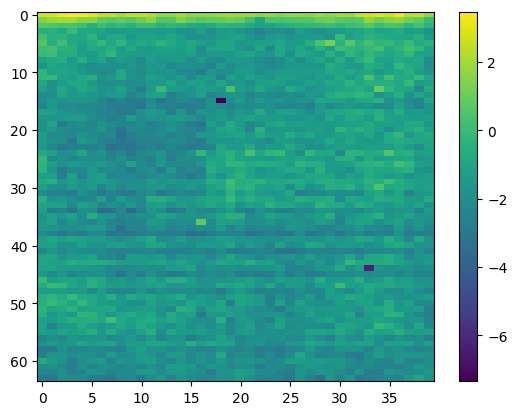

In [236]:
# 創建熱力圖
plt.imshow(df3, cmap='viridis', origin='upper', aspect='auto')

# 添加顏色欄圖示
plt.colorbar()

# 顯示圖形
plt.show()

In [237]:
#df.iloc[:, 0]

In [238]:
# 維度轉換 範例
# 二維陣列
# two_dim_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# # 使用 flatten() 方法
# one_dim_array_flatten = two_dim_array.flatten()

# # 使用 ravel() 方法
# one_dim_array_ravel = two_dim_array.ravel()

## 繪製分佈圖

In [239]:
temp = np.array(df3)
x = temp.flatten()  # 二維轉換一維
# 20230730 改用 seaborn 繪製hist分佈圖直方圖
# 繪製分佈圖

# plt.hist(x, bins=20, edgecolor='y')
# # plt.hist(x, bins='auto', edgecolor='y')
# plt.xlabel('Total %')
# plt.ylabel('PCS')
# plt.title('distribution')
# plt.show()

<Axes: ylabel='Count'>

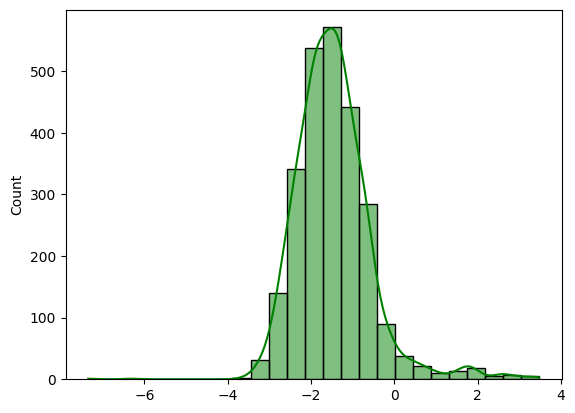

In [240]:
# 20230730 *********************
import seaborn as sns
# import numpy as np

# x = np.random.normal(size=2000)
# sns.distplot(x)
sns.histplot(x, bins=25, color='green', kde=True) # kde曲線



## 趨勢圖


* 均值
  * np.mean(nums)
* 中位数
  * np.median(nums)

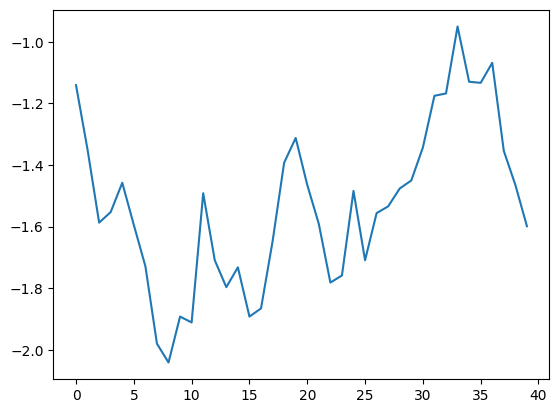

In [241]:
# import numpy
# from matplotlib import pyplot as plt
df3 = df2.dropna()  # 剔除dataframe空值
# a = df
b = []
for i in df3:
  #mean = np.mean(df2[i])
  mean = np.median(df3[i])
  b.append(mean)

# Plot the Data itself.
plt.plot(b)

plt.show()

## R1~R68 良率%


In [242]:
# 設定各Row上下限標準 依照中位數為準
bUp = []
bDn = []
allCenter = np.median(df3)
for i in df3.columns :
  #mean = np.mean(df2[i])
  meanUp = np.median(df3[i]) + 0.8
  meanDn = np.median(df3[i]) - 0.8
  bUp.append(meanUp)
  bDn.append(meanDn)


### 計算中位數

In [243]:
print('全部數據中位數:', allCenter)

全部數據中位數: -1.534


In [244]:
# print(df3.columns)

# print(bUp)
# print(b)
# print(bDn)
# # print(b)
# # for i in range(len(df3)):
# #   print(df3.iat[i, 0])

# q = len(df3['Row 1'])
# w = bUp[0]
# e = bDn[0]
# print(q, w, e)

### 計算良品數

In [245]:
# nanum = df2.isna().sum()
# naN = 0
# for i in nanum:
#   if i == True:
#     naN += 1
# print(naN)

In [246]:
from numpy.ma import count
Rows = df2.columns
# print(len(Rows))
# countAll = count(df2)
nogoodCount = 0
goodCount = 0
# countHi = 0
# countLo = 0
# yieldList = []
r_num = 0
for k in Rows:
  # print(k)
  for i in range(len(df2)):
    # print(df2.at[i, k])
    # 20230730 add Hi & Lo **********
    # if df2.at[i, k] > 4 :
    #   countHi += 1
    # if df2.at[i, k] < -8 :
    #   countLo += 1
# 20230730 ***********************
    # if df2.at[i, k] <= bUp[r_num] and df2.at[i, k] >= bDn[r_num]:
    #   goodCount += 1
    # if df2.at[i, k] > bUp[r_num] or df2.at[i, k] < bDn[r_num]:  # 依照各Row中位數 +/- 0.8 做上下限
    #   nogoodCount += 1
# 20230730 採用全體中位數做計算 *******************
    if df2.at[i, k] <= (allCenter+0.8) and df2.at[i, k] >= (allCenter-0.8):
      goodCount += 1
    if df2.at[i, k] > (allCenter+0.8) or df2.at[i, k] < (allCenter-0.8):  # 依照中位數 +/- 0.8 做上下限
      nogoodCount += 1
  r_num += 1
countAll = goodCount + nogoodCount
# sum null numbers 20230730 *******************
nanum = df2.isna().sum()
naN = 0
for i in nanum:
  if i == True:
    naN += 1
# print(naN)
# **********************************************
print("不良品數: ", nogoodCount)
print("良品數: ", goodCount)
print("Probe error: ", naN)
print("基板有效量測數: ", countAll)
print("Yield %: {:.2%}".format((countAll-nogoodCount) / countAll) )



不良品數:  806
良品數:  1910
Probe error:  4
基板有效量測數:  2716
Yield %: 70.32%


In [247]:
# df2.shape

### 繪製Row 良率圖表

[39, 43, 45, 44, 54, 47, 54, 48, 45, 48, 55, 51, 55, 47, 54, 53, 54, 52, 58, 42, 53, 51, 51, 52, 50, 48, 58, 54, 46, 51, 51, 48, 50, 46, 46, 44, 50, 46, 50, 51]


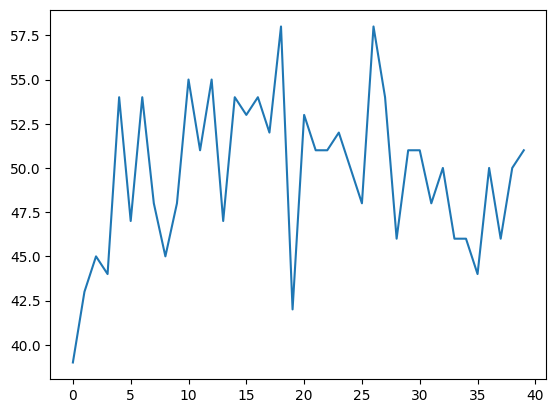

In [248]:
# 利用迴圈計數存入每一Row List
yieldCount = 0
yieldList = []
r_num = 0

for k in Rows:
  # print(k)
  for i in range(68):
    # print(df2.at[i, k])
    if df2.at[i, k] <= bUp[r_num] and df2.at[i, k] >= bDn[r_num]:  # 依照中位數 +/- 0.8 做上下限
       yieldCount += 1
  yieldList.append(yieldCount)
  yieldCount = 0
  r_num += 1

print(yieldList)

plt.plot(yieldList)
plt.show()

In [249]:
# len(yieldList)

In [250]:
# df3 = df2.dropna()  # 剔除dataframe空值

# # Plot the Data itself.
# plt.plot(df3)

# plt.show()




# 網路舉例

```

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

```

In [251]:
# from pandas._libs.algos import diff_2d
# ChatGPT 產生code
# import numpy as np
# import matplotlib.pyplot as plt


# # 產生範例資料，這裡使用了隨機的二維NumPy陣列
# #data = np.random.randint(1, 10, size=(4, 3))  # 產生一個 4x3 的二維陣列，數值範圍在 1 到 10 之間
# data = myList
# # 設置長條圖參數
# #rows = ['Row 1', 'Row 2', 'Row 3', 'Row 4']  # 每一列的標籤
# rows = df.iloc[:, 0]

# # columns = ['A', 'B', 'C']  # 每一行的標籤
# columns = df2.columns.tolist()


# # 建立長條圖
# fig, ax = plt.subplots()
# width = 0.2  # 設置每個長條的寬度
# x = np.arange(len(columns))


# for i, row in enumerate(data):
#     ax.bar(x + i * width, row, width, label=rows[i])

# # 加入標籤和圖例
# ax.set_ylabel('%')
# ax.set_title(' Row offset')
# #ax.set_xticks(x + width * (len(data) - 1) / 2)
# #ax.set_xticklabels(columns)
# # ax.legend()

# # 顯示圖形
# plt.show()
